In [37]:
r=["Yes","No","No","Yes","No","No","Yes","No","No","No"]
m=["Single","Married","Single","Married","Divorced","Married","Divorced","Single","Married","Single"]
i=["High","High","Low","High","High","Low","High","High","Low","High"]
c=["No","No","No","No","Yes","No","No","Yes","No","Yes"]

In [38]:
import pandas as pd
import numpy as np


In [39]:
df=pd.DataFrame({"refund":r,"marital_status":m,"income":i,"cheat":c})
df.to_csv("cheats.csv",index=False,encoding='utf-8')

In [40]:
print(df)

  refund marital_status income cheat
0    Yes         Single   High    No
1     No        Married   High    No
2     No         Single    Low    No
3    Yes        Married   High    No
4     No       Divorced   High   Yes
5     No        Married    Low    No
6    Yes       Divorced   High    No
7     No         Single   High   Yes
8     No        Married    Low    No
9     No         Single   High   Yes


In [41]:
type(df)

pandas.core.frame.DataFrame

In [42]:
df.shape

(10, 4)

In [43]:
df.head()

,refund,marital_status,income,cheat
0,Yes,Single,High,No
1,No,Married,High,No
2,No,Single,Low,No
3,Yes,Married,High,No
4,No,Divorced,High,Yes


In [44]:
df.value_counts("cheat")

cheat
No     7
Yes    3
dtype: int64

In [45]:
y=df['cheat']
print(y)

0     No
1     No
2     No
3     No
4    Yes
5     No
6     No
7    Yes
8     No
9    Yes
Name: cheat, dtype: object


In [46]:
df.drop('cheat',axis=1,inplace=True)
x=df
print(df)

  refund marital_status income
0    Yes         Single   High
1     No        Married   High
2     No         Single    Low
3    Yes        Married   High
4     No       Divorced   High
5     No        Married    Low
6    Yes       Divorced   High
7     No         Single   High
8     No        Married    Low
9     No         Single   High


In [47]:
from sklearn.preprocessing import LabelEncoder

In [50]:
l=LabelEncoder()
x['income']=l.fit_transform(df['income'])
x['refund']=l.fit_transform(df['refund'])
x['marital_status']=l.fit_transform(df['marital_status'])
print(x)

   refund  marital_status  income
0       1               2       0
1       0               1       0
2       0               2       1
3       1               1       0
4       0               0       0
5       0               1       1
6       1               0       0
7       0               2       0
8       0               1       1
9       0               2       0


In [51]:
from sklearn.model_selection import train_test_split
x_tr,x_tes,y_tr,y_tes=train_test_split(x,y,test_size=0.30,random_state=0)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
s=StandardScaler()
x_tr=s.fit_transform(x_tr)
x_tes=s.fit_transform(x_tes)
print(x_tr)

[[-0.8660254   1.02062073 -0.40824829]
 [-0.8660254  -0.40824829 -0.40824829]
 [ 1.15470054 -1.83711731 -0.40824829]
 [-0.8660254   1.02062073 -0.40824829]
 [ 1.15470054 -0.40824829 -0.40824829]
 [ 1.15470054  1.02062073 -0.40824829]
 [-0.8660254  -0.40824829  2.44948974]]


In [54]:
from sklearn import tree

In [55]:
c=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
c.fit(x_tr,y_tr)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [58]:
import matplotlib.pyplot as plt

[Text(0.4, 0.8333333333333334, 'X[1] <= 0.306\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.5, 'X[0] <= 0.144\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

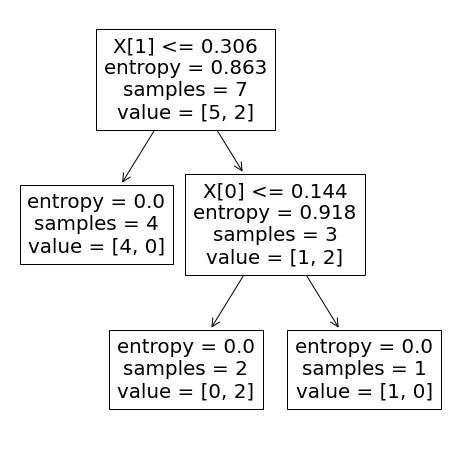

In [60]:
plt.figure(figsize=(8,8))
tree.plot_tree(c)

In [68]:
y_pred=c.predict(x_tes)
print(y_pred)

['Yes' 'No' 'No']


In [62]:
from sklearn.metrics import confusion_matrix

In [64]:
cm=confusion_matrix(y_tes,y_pred,labels=c.classes_)
print(cm)

[[1 1]
 [1 0]]


In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

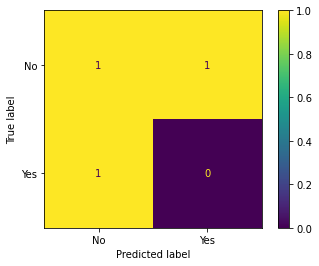

In [67]:
cd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=c.classes_)
cd.plot()

In [69]:
tes_acc=c.score(x_tes,y_tes)
tr_acc=c.score(x_tr,y_tr)
print("test accuracy ",tes_acc)
print("train accuracy ",tr_acc)

test accuracy  0.3333333333333333
train accuracy  1.0
